# Importing the data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from keras.preprocessing import sequence


%matplotlib inline
pd.options.mode.chained_assignment = None

Using TensorFlow backend.


In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
#getting rid of annoying '\n' in comment_text column

df['comment_text'] = df['comment_text'].apply(lambda x: " ".join(x.split()))

In [4]:
#dropping the unnecessary column of id 

df.drop(['id'], axis='columns', inplace=True)

In [5]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation Why the edits made under my userna...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,""" More I can't make any real suggestions on im...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
#creating a dataframe which only consists of toxic comments

df_toxic = df.loc[df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].any(axis='columns')]
df_toxic.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,Hey... what is it.. @ | talk . What is it... a...,1,0,0,0,0,0
16,"Bye! Don't look, come or think of comming back...",1,0,0,0,0,0
42,You are gay or antisemmitian? Archangel WHite ...,1,0,1,0,1,1
43,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


# Cleaning the Data

In [7]:
# Make all the text lowercase 
# Remove Punctuation 
# Remove Numerical Values 
# Remove non-sensical text 
# Only keep english text
# Tokenize Text 
# Remove Stop Words 

In [8]:
# Make all the text lowercase 

df_toxic['comment_text'] = df_toxic['comment_text'].str.lower()
df_toxic.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,cocksucker before you piss around on my work,1,1,1,0,1,0
12,hey... what is it.. @ | talk . what is it... a...,1,0,0,0,0,0
16,"bye! don't look, come or think of comming back...",1,0,0,0,0,0
42,you are gay or antisemmitian? archangel white ...,1,0,1,0,1,1
43,"fuck your filthy mother in the ass, dry!",1,0,1,0,1,0


In [9]:
df_toxic.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,cocksucker before you piss around on my work,1,1,1,0,1,0
12,hey... what is it.. @ | talk . what is it... a...,1,0,0,0,0,0
16,"bye! don't look, come or think of comming back...",1,0,0,0,0,0
42,you are gay or antisemmitian? archangel white ...,1,0,1,0,1,1
43,"fuck your filthy mother in the ass, dry!",1,0,1,0,1,0


In [10]:
df_toxic.shape

(16225, 7)

In [11]:
# Remove non-sensical text 
import re

df_toxic['comment_text'] = df_toxic['comment_text'].apply(lambda x: re.sub('[\W_]', ' ', x))

In [12]:
# Remove numerical values

df_toxic['comment_text'] = df_toxic['comment_text'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]) )

In [13]:
# Remove Punctuation 

import string

df_toxic['comment_text'] = df_toxic['comment_text'].str.translate(str.maketrans('', '', string.punctuation))

In [14]:
# keep only english words

import nltk 

words = set(nltk.corpus.words.words())
content = df_toxic['comment_text'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) \
         if w.lower() in words or not w.isalpha()))

# we will use this content in the future to create word clouds 

In [15]:
from sklearn.feature_extraction.text import CountVectorizer 

stop_words = nltk.corpus.stopwords.words('english') # getting rid of everyday words that don't provide much meaning
extension = ['like', 'go', 'get', 'know', 'hi', 'one', 'want', 'user', 'would', 'dont', 'make', 'hey', 'well',
            'say', 'see']
stop_words.extend(extension)
cv = CountVectorizer(stop_words= stop_words) 
data_cv = cv.fit_transform(content) # Putting our text data in document-matrix-form 

#creating a pandas dataframe for our document term matrix
dtm = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
dtm.index = df_toxic['comment_text'].index
dtm = dtm.T  

In [16]:
dtm.head()

,6,12,16,42,43,44,51,55,56,58,...,159423,159448,159449,159478,159493,159494,159514,159541,159546,159554
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abacus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandoned,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploring the data

In [17]:
# number of times the word was said 

dtm['count'] = dtm.sum(axis='columns')

In [18]:
# moving the count column to the left side 

first_col = dtm.pop('count')
dtm.insert(0, 'count', first_col)

In [19]:
dtm.head()

,count,6,12,16,42,43,44,51,55,56,...,159423,159448,159449,159478,159493,159494,159514,159541,159546,159554
aa,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abacus,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandoned,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abb,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# finding the top 15 words that were said that were classified as toxic

dtm['count'].sort_values(ascending=False)[:16]

# as we can see the words most classified as toxic were racist and homophobic

nigger     3306
suck       3249
ass        3005
hate       2656
page       2382
gay        2267
die        2141
people     2070
fat        1982
moron      1886
bitch      1841
talk       1643
article    1574
stop       1512
stupid     1491
think      1397
Name: count, dtype: int64

In [21]:
x = dtm['count'].sort_values(ascending=False).index[:16]
y = dtm['count'].sort_values(ascending=False).values[:16]

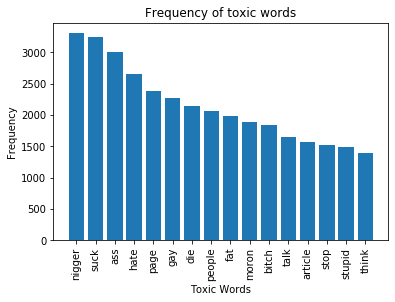

In [22]:
plt.bar(x, height=y)
plt.title('Frequency of toxic words')
plt.xlabel('Toxic Words')
plt.ylabel('Frequency')
plt.xticks(x, rotation='vertical')
plt.show()

In [23]:
words = content.values
content_val = (' ').join(words) # this is the necessary input structure for word clouds 

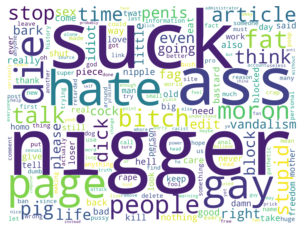

In [24]:
# creating word clouds for the toxic category 
# content is our clean dataframe that had not yet been put into the form of document term matrix

from wordcloud import WordCloud, ImageColorGenerator

words = content_val

wc = WordCloud(stopwords=stop_words, background_color = 'white', random_state=42,
               collocations=False, width=2000, height=1500, min_font_size=10).generate(words)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# I don't condone these words, this word cloud is for viewing purposes only

# Preprocessing the data for the model

In [25]:
df_model = pd.read_csv('train.csv')

In [26]:
df_model.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [27]:
# make it a binary classification (toxic or not)

df_model['toxic_clf'] = df_model[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].any(
                    axis=1).apply(lambda x: 1 if x == True else 0)

df_model.drop(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'], axis='columns', inplace=True)

In [28]:
df_model.head()

,id,comment_text,toxic_clf
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0


In [29]:
# drop unnecessary column of ID
df_model.drop(['id'], axis='columns', inplace=True)

In [30]:
# getting rid of pesky \n

df_model['comment_text'] = df_model['comment_text'].apply(lambda x: " ".join(x.split()))

In [31]:
# keep only english words

import nltk 

words = set(nltk.corpus.words.words())
df_model['comment_text'] = df_model['comment_text'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) \
         if w.lower() in words or not w.isalpha()))

In [32]:
# Remove numerical values

df_model['comment_text'] = df_model['comment_text'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]) )

# Embedding

In [33]:
import pickle

In [34]:
# reading in our pickled file

pickle_in = open('pickle_filt', 'rb')
split_words = pickle.load(pickle_in)

In [35]:
split_words[0]

['Explanation',
 'Why',
 'the',
 'made',
 'under',
 'my',
 'Fan',
 'were',
 '?',
 'They',
 "'",
 't',
 ',',
 'just',
 'closure',
 'on',
 'some',
 'GAs',
 'after',
 'I',
 'at',
 'New',
 'York',
 '.',
 'And',
 'please',
 'don',
 "'",
 't',
 'remove',
 'the',
 'template',
 'from',
 'the',
 'talk',
 'page',
 'since',
 'I',
 "'",
 'm',
 'retired',
 'now',
 '.',
 '.',
 '.',
 '.']

In [36]:
df_model.head()

,comment_text,toxic_clf
0,Explanation Why the made under my Fan were ? T...,0
1,D ' ! He this background colour I ' m seemingl...,0
2,"Hey man , I ' m really not trying to edit war ...",0
3,""" More I can ' t make any real on improvement ...",0
4,"You , sir , are my hero . Any chance you remem...",0


In [37]:
# Splitting data into the training and validation set

from sklearn.model_selection import train_test_split

X = df_model['comment_text']
y = df_model['toxic_clf'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
# Turning our text data into numerical values 

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 10000

tk = Tokenizer(
    num_words= max_words,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=" ",
)

tk.fit_on_texts(X_train)
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

In [39]:
X_train_seq[0]

[179,
 6,
 20,
 57,
 1124,
 4,
 46,
 707,
 2,
 649,
 13,
 308,
 46,
 97,
 177,
 6,
 97,
 196,
 1100,
 24,
 13,
 1,
 1204,
 140,
 1,
 308,
 30]

In [40]:
word_index = tk.word_index

In [41]:
word_index

{'the': 1,
 'to': 2,
 'i': 3,
 'of': 4,
 'and': 5,
 'you': 6,
 'a': 7,
 "'": 8,
 'is': 9,
 'that': 10,
 'it': 11,
 'in': 12,
 'for': 13,
 'this': 14,
 'not': 15,
 'on': 16,
 'be': 17,
 'as': 18,
 's': 19,
 'have': 20,
 'are': 21,
 'your': 22,
 't': 23,
 'with': 24,
 'if': 25,
 'article': 26,
 'was': 27,
 'or': 28,
 'but': 29,
 'page': 30,
 'my': 31,
 'an': 32,
 'from': 33,
 'by': 34,
 'do': 35,
 'at': 36,
 'can': 37,
 'talk': 38,
 'me': 39,
 'about': 40,
 'so': 41,
 'what': 42,
 'there': 43,
 'all': 44,
 'will': 45,
 'please': 46,
 'one': 47,
 'would': 48,
 'no': 49,
 'they': 50,
 'he': 51,
 'like': 52,
 'just': 53,
 'which': 54,
 'we': 55,
 'any': 56,
 'been': 57,
 'should': 58,
 'don': 59,
 'more': 60,
 'some': 61,
 'other': 62,
 'who': 63,
 'here': 64,
 'see': 65,
 'also': 66,
 'his': 67,
 'm': 68,
 'think': 69,
 'know': 70,
 'because': 71,
 'am': 72,
 'how': 73,
 'people': 74,
 'edit': 75,
 'why': 76,
 'up': 77,
 'only': 78,
 'out': 79,
 'use': 80,
 'when': 81,
 'then': 82,
 'time'

In [42]:
vocab_size = len(word_index.keys())

In [43]:
# we now need to 'pad' the data as our model will only take in inputs that are of equivilant size

max_words = 50  

train_text = pad_sequences(X_train_seq, max_words, padding="post")
test_text = pad_sequences(X_test_seq, max_words, padding="post")

In [44]:
len(train_text[1])

50

# Building our actual model

# Saving our model

In [45]:
from tensorflow.keras.models import load_model

model = load_model('toxic_model.h5')
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          572496    
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_1 (Dense) 

# Writing functions so we can use model to predict toxicity 

In [46]:
def clean(data):
    data = " ".join(data.split()) # getting rid of \n
    
    data = data.lower()
    
    words = set(nltk.corpus.words.words()) # keeping english words only
    data =  " ".join(w for w in nltk.wordpunct_tokenize(data) \
         if w.lower() in words or not w.isalpha())
    
    data = ''.join([i for i in data if not i.isdigit()]) # getting rid of numerical values
    
    data = text_to_word_sequence(data) # splitting the input into individual words
    
    return data

In [47]:
# Turning our text data into numerical values 

def tokenize(text):
    max_words = 10000

    tk = Tokenizer(
        num_words= max_words,
        filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
        lower=True,
    )

    tk.fit_on_texts(X_train)
    
    text = tk.texts_to_sequences(text)
    
    text = [[item for sublist in text for item in sublist]]
    
    max_words = 50  

    ps = pad_sequences(text, max_words, padding="post")
    
    return ps
    

In [48]:
def toxic_clf(data):
    text = clean(data)
    input_text = tokenize(text)
    
    prediction = model.predict(input_text)
        
    if (prediction < 0.5):
        return ('benign')
    else:
        return ('toxic')

In [49]:
x = 'You stupid'

toxic_clf(x)

'toxic'

In [50]:
y = 'I am in love with this post'

toxic_clf(y)

'benign'

In [51]:
z = 'I hate you'

toxic_clf(z)

'toxic'

In [53]:
a = 'I think you are a great person'

toxic_clf(a)

'benign'

In [54]:
b = 'You are so fat'

toxic_clf(b)

'toxic'

In [57]:
c = 'Everyone thinks you are stupid'

toxic_clf(c)

'toxic'